In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

2023-10-15 13:16:01.898807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 335s 2us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train[1].shape

(32, 32, 3)

In [10]:
import matplotlib.pyplot as plt

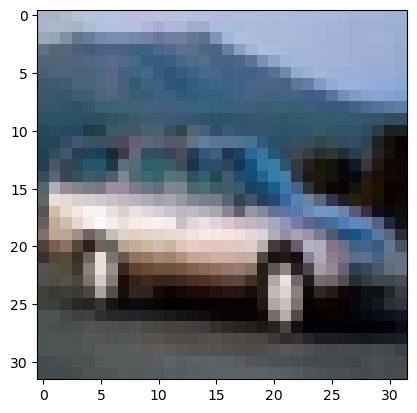

In [13]:
# CAR
plt.imshow(x_train[4])

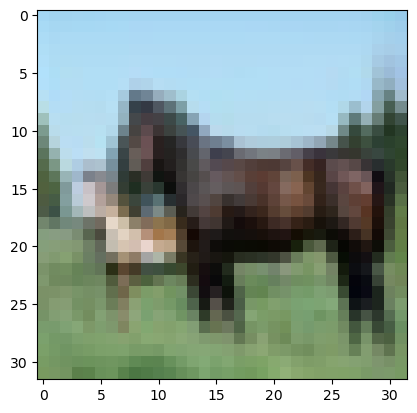

In [14]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [15]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
x_train[0].shape

(32, 32, 3)

In [17]:
x_train.max()

255

In [18]:
x_train = x_train/225

In [19]:
x_test = x_test/255

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_train[0]

array([6], dtype=uint8)

In [25]:
y_cat_train = to_categorical(y_train,10)

In [26]:
y_cat_train.shape

(50000, 10)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2023-10-15 13:24:39.449983: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [34]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5316 - accuracy: 0.4487 - val_loss: 1.2701 - val_accuracy: 0.5393
Epoch 2/15
1563/1563 [==============================] - 161s 103ms/step - loss: 1.1789 - accuracy: 0.5851 - val_loss: 1.2925 - val_accuracy: 0.5408
Epoch 3/15
1563/1563 [==============================] - 165s 105ms/step - loss: 1.0239 - accuracy: 0.6438 - val_loss: 1.1541 - val_accuracy: 0.5930
Epoch 4/15
1563/1563 [==============================] - 158s 101ms/step - loss: 0.9190 - accuracy: 0.6805 - val_loss: 1.0486 - val_accuracy: 0.6344
Epoch 5/15
1563/1563 [==============================] - 163s 105ms/step - loss: 0.8319 - accuracy: 0.7141 - val_loss: 1.0514 - val_accuracy: 0.6543
Epoch 6/15
1563/1563 [==============================] - 137s 87ms/step - loss: 0.7648 - accuracy: 0.7370 - val_loss: 1.0637 - val_accuracy: 0.6499
Epoch 7/15
1563/1563 [==============================] - 153s 98ms/step - loss: 0.7107 - accuracy: 0.7565 - val_los

In [35]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.531578,0.44868,1.270124,0.5393
1,1.178932,0.58510,1.292514,0.5408
2,1.023918,0.64376,1.154130,0.5930
3,0.919016,0.68054,1.048563,0.6344
4,0.831852,0.71406,1.051385,0.6543


<Axes: >

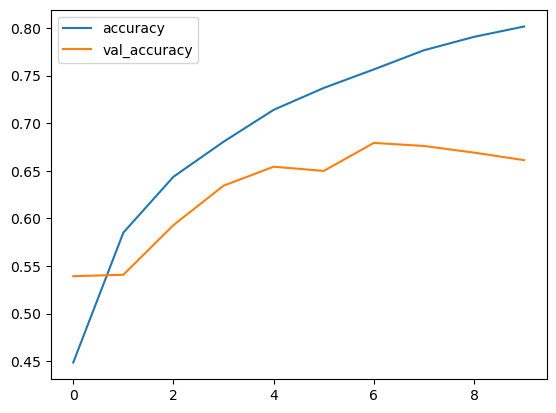

In [38]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

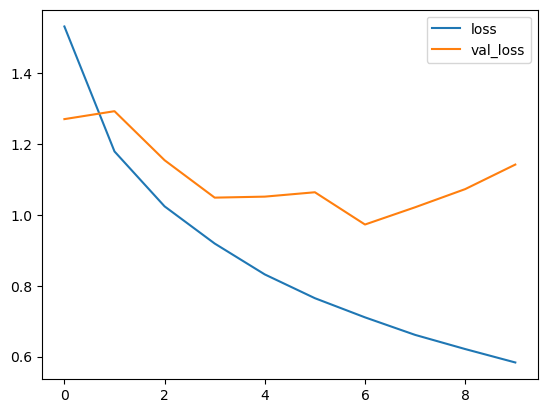

In [39]:
losses[['loss','val_loss']].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.141877293586731, 0.6611999869346619]


In [45]:
confusion_matrix(y_test,predictions)

NameError: name 'predictions' is not defined

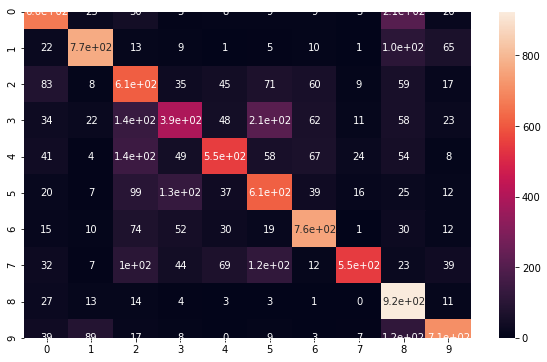

In [54]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751